In [1]:
import pandas as pd
import numpy as np
from io import StringIO


##  Exercise 1: I _vant_ to manually read your data

Consider the following [Fall 2019 Freshman profile](http://dmi.illinois.edu/stuenr/abstracts/FA19freshman_ten.htm) made available by the [Division of Management Information (DMI)](http://dmi.illinois.edu).

|College               | Number| Percent|
|:---------------------|------:|-------:|
|Agr, Cons, Env Sci    |    538|   0.070|
|Applied Health Sci    |    287|   0.037|
|Business              |    591|   0.077|
|Education             |    138|   0.018|
|Fine & Applied Arts   |    381|   0.050|
|General Studies       |   1498|   0.195|
|Grainger Engineering  |   1628|   0.212|
|Liberal Arts & Sci    |   2411|   0.315|
|Media                 |    142|   0.019|
|School of Social Work |     51|   0.007|



### a

Translate the table from `markdown` to a pandas `DataFrame`


In [7]:
?pd.read_csv

Object `StringIO` not found.


In [17]:
?pd.DataFrame.drop

In [68]:
data_csv = StringIO("""|College               | Number| Percent|
|Agr, Cons, Env Sci    |    538|   0.070|
|Applied Health Sci    |    287|   0.037|
|Business              |    591|   0.077|
|Education             |    138|   0.018|
|Fine & Applied Arts   |    381|   0.050|
|General Studies       |   1498|   0.195|
|Grainger Engineering  |   1628|   0.212|
|Liberal Arts & Sci    |   2411|   0.315|
|Media                 |    142|   0.019|
|School of Social Work |     51|   0.007|""")

freshmen = pd.read_csv(data_csv, sep = "|", skipinitialspace = True)

display(freshmen)

,Unnamed: 0,College,Number,Percent,Unnamed: 4
0,NaN,"Agr, Cons, Env Sci",538,0.070,NaN
1,NaN,Applied Health Sci,287,0.037,NaN
2,NaN,Business,591,0.077,NaN
3,NaN,Education,138,0.018,NaN
4,NaN,Fine & Applied Arts,381,0.050,NaN
5,NaN,General Studies,1498,0.195,NaN
6,NaN,Grainger Engineering,1628,0.212,NaN
7,NaN,Liberal Arts & Sci,2411,0.315,NaN
8,NaN,Media,142,0.019,NaN
9,NaN,School of Social Work,51,0.007,NaN


In [69]:
freshmen.drop(["Unnamed: 0", "Unnamed: 4"], axis = 1, inplace = True)
display(freshmen)

,College,Number,Percent
0,"Agr, Cons, Env Sci",538,0.070
1,Applied Health Sci,287,0.037
2,Business,591,0.077
3,Education,138,0.018
4,Fine & Applied Arts,381,0.050
5,General Studies,1498,0.195
6,Grainger Engineering,1628,0.212
7,Liberal Arts & Sci,2411,0.315
8,Media,142,0.019
9,School of Social Work,51,0.007


### b

Programatically, find the name of the college that has the maximum number of students enrolled and display its enrollment.

In [70]:
#we first remove the whitespace in the column names

freshmen.columns = freshmen.columns.str.replace(' ', '')
freshmen.columns

Index(['College', 'Number', 'Percent'], dtype='object')

In [79]:
freshmen[freshmen["Number"] == max(freshmen["Number"])]

,College,Number,Percent
7,Liberal Arts & Sci,2411,0.315


## Exercise 2: Yummy Ramen

For this exercise, we'll be working with a cleaned version of the [Ramen Ratings dataset](https://www.kaggle.com/datasets/residentmario/ramen-ratings). Inside the data set, we have 5 variables:

- `'Brand'`: the brand of the ramen product.
- `'Variety'`: the product’s name on its label.
- `'Style'`: packaging style (cup, bowl, tray, etc.)
- `'Country'`: country or dependent territory the product was produced in.
- `'Stars'`: the rating of the product on a 5-point scale.

This dataset is available at: 

<https://coatless.github.io/raw-data/ramen-ratings-cleaned.csv>


Load the Ramen Ratings dataset into a _Python_ variable called `ramen` using `pandas` library.

In [3]:
import pandas as pd

ramen = pd.read_csv("https://coatless.github.io/raw-data/ramen-ratings-cleaned.csv")

In [4]:
display(ramen)

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...
2572,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50
2573,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
2574,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
2575,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


### a

Filter only the observations where the ramen is made in Japan and in Cup, OR the ramen is made in Thailand and in Pack.

In [5]:
ramen[( (ramen["Country"] == "Japan") & (ramen["Style"] == "Cup") ) |
      (ramen["Country"] == "Thailand") & (ramen["Style"] == "Pack") ]

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
6,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00
10,Tao Kae Noi,Creamy tom Yum Kung Flavour,Pack,Thailand,5.00
111,Acecook,Dossari Yasai Chanpon,Cup,Japan,4.25
145,Nissin,Cup Noodles Indonesia Mie Goreng,Cup,Japan,3.75
...,...,...,...,...,...
2490,Wai Wai,Tom Yum Shrimp Cream Soup,Pack,Thailand,2.75
2542,Mama,Chand Clear Soup,Pack,Thailand,3.00
2573,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
2574,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00


### b

Filter only the observations where the ramen had **at least 4 stars** and it is made in `USA` or `United States`.

In [6]:
ramen[ramen["Stars"]=="Unrated"] = np.nan
ramen[ramen["Stars"]=="Unrated"]

,Brand,Variety,Style,Country,Stars


In [7]:
# we first convert stars to a numeric entry rather than a string
ramen["Stars"] = ramen["Stars"].astype(float)

# the below should to the same but does not work for series
# ramen["Stars"] = ramen["Stars"].to_numeric()
ramen.dtypes

Brand       object
Variety     object
Style       object
Country     object
Stars      float64
dtype: object

In [8]:
ramen[( ramen["Stars"] >= 4 ) 
      & ( (ramen["Country"] == "USA" ) 
         | (ramen["Country"] == "United States") )]

,Brand,Variety,Style,Country,Stars
11,Yamachan,Yokohama Tonkotsu Shoyu,Pack,USA,5.00
17,Yamachan,Tokyo Shoyu Ramen,Pack,USA,5.00
21,Jackpot Teriyaki,Beef Ramen,Pack,USA,5.00
23,Yamachan,Sapporo Miso Ramen,Pack,USA,4.75
38,Nissin,Cup Noodles Very Veggie Spicy Chicken Flavor R...,Cup,USA,5.00
...,...,...,...,...,...
2372,Sapporo Ichiban,Beef Flavor,Pack,USA,4.50
2377,Nongshim,Bowl Noodle Spicy Chicken,Bowl,USA,4.50
2435,Nissin,Chow Mein Teriyaki Beef,Tray,USA,4.50
2511,Maruchan,Ramen Noodle Soup Pork,Pack,USA,4.00


### c

Filter only the `Brand` and `Variety` attributes (columns) of the observations where the ramen had at least 4 stars and it is made in `Vietnam`.

In [10]:
ramen[ (ramen["Stars"] >= 4 ) & (ramen["Country"] == "Vietnam") ].loc[:,["Brand", "Variety"]]

,Brand,Variety
18,Binh Tay,Mi Hai Cua
224,Vifon,Viet Cuisine Bun Rieu Cua Sour Crab Soup Insta...
365,Acecook,Oh! Ricey Pork Flavour
915,Vina Acecook,King Chef Authentic Kimchi Flavour
932,New Way,Spaghetti Instant Noodles
1722,Vina Acecook,Bestcook Hot & Sour Shrimp
1988,Vifon,South Korean Style Kim Chee
2130,Ve Wong,Little Prince Bacon
2155,Vifon,Mi Lau Thai Thai Stle
2181,Vina Acecook,Bestcook Hot spicy Tom Yum Shrimp


### d

Filter only the `Variety` and `Stars` attributes of the observations where the ramen had **at most 2 stars** and the brand is `Nissin`.

In [11]:
ramen[(ramen['Stars'] <= 2) 
      & (ramen['Brand'] == "Nissin") ].loc[:,["Variety", "Stars"]]

,Variety,Stars
1334,Demae Rice Vermicelli Chicken Flavour Instant ...,1.75
2314,Chow Mein Kung Pao Chicken,1.50
2381,Cup Noodles Pani Puri,1.50
2394,Bowl Noodles Hot & Spicy Chicken,2.00
2420,Sotanghon,2.00
2423,Creamy Chicken,1.75
2440,Bowl Noodles Rich & Savory Chicken,1.75
2494,Demae Ramen Spicy Flavor,2.00
2553,Demae Ramen Spicy Seafood With Chili Pepper,2.00


### e

Compute the mean stars rating of all ramen made in the US (that is `USA` and `United States`).

In [12]:
ramen[(ramen["Country"] == "USA") | (ramen["Country"] == "United States")]["Stars"].mean()

3.4579475308641974

### f

Find the maximum stars rating of a Vifon ramen (of brand Vifon).

In [13]:
ramen[ramen["Brand"]=="Vifon"]["Stars"].max()

5.0

### g

Find the observation (meaning the whole row) of the a Nongshim ramen with the lowest stars rating.

In [14]:
ramen[ (ramen["Brand"]== "Nongshim") & (ramen["Stars"] == ramen[ramen["Brand"]=="Nongshim"]["Stars"].min() ) ]

,Brand,Variety,Style,Country,Stars
196,Nongshim,Seaweed Instant Noodle,Cup,South Korea,0.5


### h

Identify and display the observation (meaning the whole row) of the Vifon ramen that has stars rating of 5.0 given in **(f)**.

In [15]:
ramen[ (ramen["Brand"]== "Vifon") & (ramen["Stars"] == ramen[ramen["Brand"]=="Vifon"]["Stars"].max() ) ]

,Brand,Variety,Style,Country,Stars
224,Vifon,Viet Cuisine Bun Rieu Cua Sour Crab Soup Insta...,Bowl,Vietnam,5.0


### i

Compute the average rating of all **beef-flavored** ramen in the US. That is,

- Find all the ramen observation produced in the US (only 'USA') with the word **beef** (`beef`, `Beef`, or `BEEF` must all be counted) in its label.
- Compute the average star rating of those observations.

In [135]:
display(ramen[(ramen["Country"] == "USA") & (ramen["Variety"].str.contains("beef", case = False))])

ramen[(ramen["Country"] == "USA") & (ramen["Variety"].str.contains("beef", case = False))]["Stars"].mean()

,Brand,Variety,Style,Country,Stars
21,Jackpot Teriyaki,Beef Ramen,Pack,USA,5.000
41,Nissin,Cup Noodles Very Veggie Beef Flavor Ramen Nood...,Cup,USA,5.000
195,Nissin,Cup Noodles Beef Flavor Ramen Noodle Soup (New...,Cup,USA,3.500
319,Farmer's Heart,Pho Beef Flavor Vietnamese Rice Noodle Soup,Bowl,USA,3.750
475,Roland,Ramen Japanese Style Quick-Cooking Alimentary ...,Pack,USA,0.000
506,Maruchan,Bowl Taste Of Asia Beef Flavor Sukiyaki Ramen,Bowl,USA,5.000
757,Myojo,Udon Japanese Style Pre-Cooked Noodles With So...,Bowl,USA,3.250
776,Nissin,Cup Noodles Ramen Noodles Ramen Noodle Soup Be...,Cup,USA,3.500
1211,Nongshim,Sir Long Tang Creamy Beef Noodle Soup,Cup,USA,4.250
1240,Sakura Noodle,Chikara Brand Udon Beef Flavor,Pack,USA,4.250


3.484375

### j

Your boss does not think that the reviewers of Ramen really like chicken-flavored ramen as much as other types. So, they want you to adjust the ratings of **chicken-flavored** ramen observations. That is, the ramen label contains the word **chicken** (`chicken`, `Chicken`, or `CHICKEN` must all be counted). If the rating of a chicken-flavored ramen is less than 1, change it to 0. If it is at least 1, lower the rating by 1.

In [159]:
print(ramen.loc[(ramen["Variety"].str.contains("chicken", case = False)), "Stars"].max())
print(ramen.loc[(ramen["Variety"].str.contains("chicken", case = False)), "Stars"].mean())

5.0
3.3945884146341463


In [164]:
ramen_c = ramen

# code here
ramen_c.loc[(ramen_c["Variety"].str.contains("chicken", case = False)) & (ramen_c["Stars"] <= 1), "Stars"] = 0

In [165]:

ramen_c.loc[(ramen["Variety"].str.contains("chicken", case = False)) & (ramen_c["Stars"] > 1), "Stars"] = ramen_c["Stars"] - 1


In [166]:

print(ramen_c.loc[(ramen_c["Variety"].str.contains("chicken", case = False)), "Stars"].max())
print(ramen_c.loc[(ramen_c["Variety"].str.contains("chicken", case = False)), "Stars"].mean())

4.0
2.409375


### k

Set the `Stars` rating of all Nissin ramen in the US to be 0.

In [169]:
# code here
ramen.loc[(ramen["Brand"] == "Nissin") 
          & ((ramen["Country"] == "USA") 
             |(ramen["Country"] == "United States") ),
          "Stars"] = 0

In [170]:
# Verify the data frame was modified by 
# running this cell to check your answser
# Note: the output should be 0
ramen[(ramen['Brand'] == 'Nissin') & (ramen['Country'] == 'USA')]['Stars'].sum()

0.0

### l

Remove all the observations of brand Nissin in the US from `ramen`.

In [181]:
# code here
ramen.drop(ramen[(ramen['Brand'] == 'Nissin') & (ramen['Country'] == 'USA')].index, axis = 0, inplace = True)

In [182]:
# Verify the data frame was modified by 
# running this cell to check your answser
# the output should be an empty dataframe
ramen[(ramen['Brand'] == 'Nissin') & (ramen['Country'] == 'USA')]

,Brand,Variety,Style,Country,Stars


# Exercise 3: Excellency at UIUC

Under this exercise, we will explore the "Teachers Ranked As Excellent" data
at UIUC from Fall 1993 to Summer 2020 as compiled by 
[Wade Fagen-Ulmschneider](http://waf.cs.illinois.edu/).
The data is available from:

<https://raw.githubusercontent.com/wadefagen/datasets/master/teachers-ranked-as-excellent/uiuc-tre-dataset.csv> 

This data has a file extension of **CSV** form. Contained in the data are the following variables:

- `term`: Two letter semester code (`sp`, `su`, `fa`, or `wi`) followed by a four digit year.
    - Examples: `sp2017`, `fa2013`, `su2012`.
- `unit`: The CITL-supplied headers for the unit teaching the course.
    - Examples: `ACCOUNTANCY`, `SOCIAL WORK`, `LINGUISTICS`, `NUCLEAR, PLASMA & RAD. ENGR.`
- `lname`: The last name of the teacher.
    - Examples: `FAGEN-ULMSCHNEIDER`, `FLANAGAN`, `FLECK`
- `fname`: The first letter of the first name of the teacher.
    - Examples: `W`, `K`, `M`
- `role`: `Instructor` or `TA`
- `ranking`: `Excellent` or `Outstanding`
- `course`: The course the teacher was ranked as excellent.  If no course is given, the `course` field is set to `?` (this includes cases when the raw data lists the course as `0`, `000`, or `999`).
    - Examples: `199`, `225`, `560`, `?`




## a 

Import into _Python_ the data in `uiuc-tre-dataset.csv`. 

**Note:** As `course` denotes a value that is
_not_ `NaN`, which is how _Python_ represents missing values, you must use the parameter 
`na_values = ['NA','?'] ` during the import with pandas.

In [183]:
teachers = pd.read_csv("https://raw.githubusercontent.com/wadefagen/datasets/master/teachers-ranked-as-excellent/uiuc-tre-dataset.csv",
                  na_values = ['NA','?'])

## b 

First, obtain the overarching data frame information. 
Second, obtain the numerical summary of the data. 

Given both of the outputs, which variable output is different from the rest? What might have caused this?

Data set overview:

In [185]:
teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102600 entries, 0 to 102599
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   term     102600 non-null  object 
 1   unit     102600 non-null  object 
 2   lname    102597 non-null  object 
 3   fname    102534 non-null  object 
 4   role     102600 non-null  object 
 5   ranking  102600 non-null  object 
 6   course   101578 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.5+ MB


Numerical summary:

In [184]:
teachers.describe()

,course
count,101578.000000
mean,300.607986
std,163.817991
min,2.000000
25%,143.000000
50%,262.000000
75%,431.000000
max,798.000000


Variable difference explanation:

Only one variable is numeric, so we only get the summary statistics for that variable.

## c

1. Verify that `course` has `NaN` values. 
2. Perform a median imputation to remove `NaN` values.


In [196]:
teachers["course"].isna().any()


True

In [198]:
teachers[teachers["course"].isna()] = teachers["course"].median()
teachers["course"].isna().any()

False

## d

1. Search for the following professor names in the list of excellency: `Douglas`, `Simpson`, and `Dalpiaz`. 
  - _Hint_: Search the `lname` variable in the `DataFrame`.
  - _Hint_: Make sure to search the _last name_ with capital letters.

2. Compute the total number of times they appeared in the excellency ratings.



In [209]:
teachers[((teachers["lname"] == "SIMPSON") | (teachers["lname"] == "DOUGLAS") | (teachers["lname"] == "DALPIAZ"))].shape[0]

76

## e

Drop the `fname` column in-place.

In [210]:
teachers.drop(["fname"], axis = 1, inplace = True)

In [211]:
teachers.columns

Index(['term', 'unit', 'lname', 'role', 'ranking', 'course'], dtype='object')

## f

Split the data into a training and testing data set. The weight should be 65% training and 35% testing.

In [212]:
teachers = teachers.reindex( np.random.permutation(teachers.index))
teachers.head(10)

,term,unit,lname,role,ranking,course
50126,fa1997,BUSINESS ADMINISTRATION,ENGELBRECHT-WIGGANS,Instructor,Excellent,475.0
25104,fa2009,HUMAN & COMMUNITY DEVELOPMENT,SHAPIRO,Instructor,Excellent,199.0
7151,sp1995,URBAN & REGIONAL PLANNING,KUMAR,TA,Excellent,402.0
21018,fa2007,GEOLOGY,BETHKE,Instructor,Excellent,470.0
10231,262.0,262.0,262.0,262.0,262.0,262.0
36709,fa2012,NATURAL RESOURCES & ENVIRONMENTAL SCIENCES,SUSKI,Instructor,Outstanding,409.0
92049,sp2018,CIVIL & ENVIRONMENTAL ENGINEERING,GONCALVES,TA,Outstanding,449.0
52022,fa1998,"SPANISH, ITALIAN AND PORTUGUESE",LEWIS,TA,Excellent,216.0
93131,sp2018,LAW,KRAMER,Instructor,Outstanding,792.0
66952,sp2014,ART & DESIGN,MEIER,Instructor,Outstanding,510.0


In [213]:
teachers.iloc[7151,:]

term            fa1998
unit             MUSIC
lname         STIFFLER
role                TA
ranking    Outstanding
course           142.0
Name: 51830, dtype: object

In [216]:
teachers_train = teachers.iloc[range(0,int(0.8*teachers.shape[0])),:]
teachers_test = teachers.iloc[range(int(0.8*teachers.shape[0]),teachers.shape[0])]
teachers_train.shape[0] + teachers_test.shape[0] - teachers.shape[0]

0

## g

Create a bar plot on `role` to see the counts of how often a `Instructor` or `TA` make the list.

<AxesSubplot:>

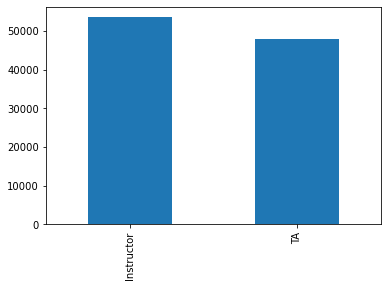

In [226]:
teachers[ ((teachers["role"] == "TA") | (teachers["role"] == "Instructor") )].role.value_counts().plot.bar()